In [8]:
from make_prediction import *

# path to model
PATH = "/content/drive/MyDrive/Colab_Notebooks/RevolutionAIze/model1.pt"
loaded_model = torch.load(PATH, map_location=get_device())

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install owslib

     |████████████████████████████████| 216 kB 4.3 MB/s 
     |████████████████████████████████| 6.3 MB 46.2 MB/s 


In [23]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from PIL import Image, ImageDraw, ImageFont
from tqdm import tqdm
from map_retrievel_and_segmentation import get_area, sliding_window
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [112]:
lon, lat = -1.647602, -56.52
#lon, lat = -1.614115, -56.53477
#lon, lat  = -2.505752, -56.175228
n_tiles = 13  # non-vectorized: ~1 it/s
dummy=False
year1, year2 = "2019", "2020"


100%|██████████| 169/169 [02:42<00:00,  1.04it/s]


Num total: 169, Num forest: 124, Percentage: 0.7337278106508875


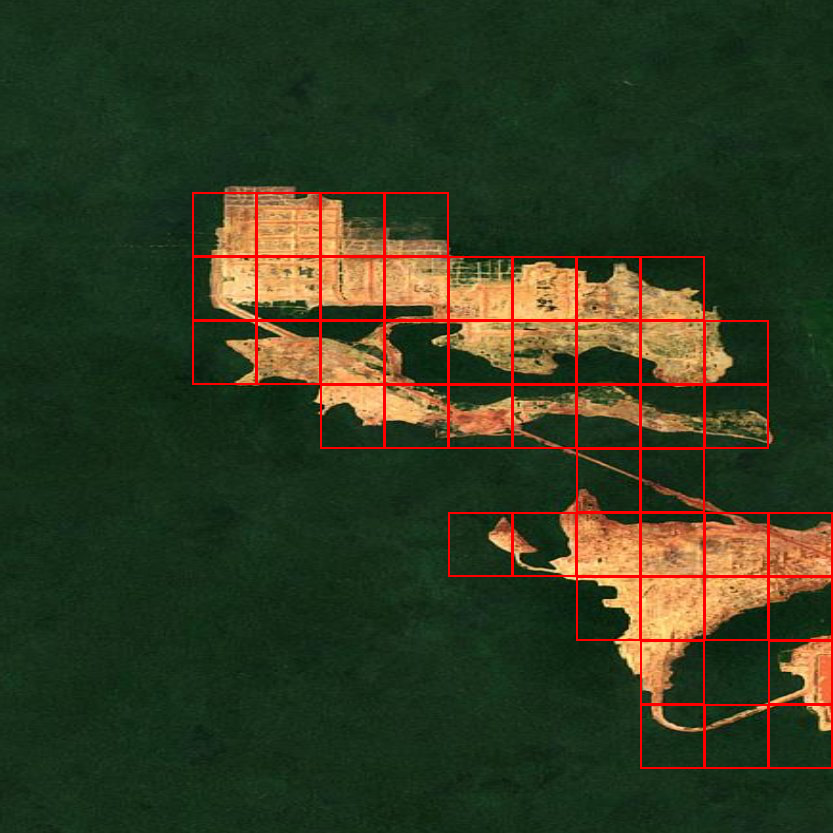

In [113]:
img = get_area(lon, lat, n_tiles=n_tiles, year = year1)
num_forest = 0
for im, is_forest in tqdm(sliding_window(img, loaded_model, 64, 64, dummy_classification=dummy), total=n_tiles**2):
    num_forest += int(is_forest)

print(f"Num total: {n_tiles**2}, Num forest: {num_forest}, Percentage: {num_forest/n_tiles**2}")
img.save(year1 + '.jpg')

area_tile = 0.64**2
total_area = area_tile * n_tiles**2
deforested_area = total_area - num_forest*area_tile
print(f"Total area: {total_area:.3}, deforested_ara: {deforested_area:.3}, Percentage: {deforested_area/total_area:.3%}")
img

In [120]:
area_tile = 0.64**2
total_area = area_tile * n_tiles**2
deforested_area = total_area - num_forest*area_tile
print(f"Total area: {total_area:.3}, deforested_ara: {deforested_area:.3}, Percentage: {deforested_area/total_area:.3%}")

Total area: 69.2, deforested_ara: 18.4, Percentage: 26.627%


100%|██████████| 169/169 [02:33<00:00,  1.10it/s]


Total area: 69.2, deforested_ara: 19.7, Percentage: 28.402%


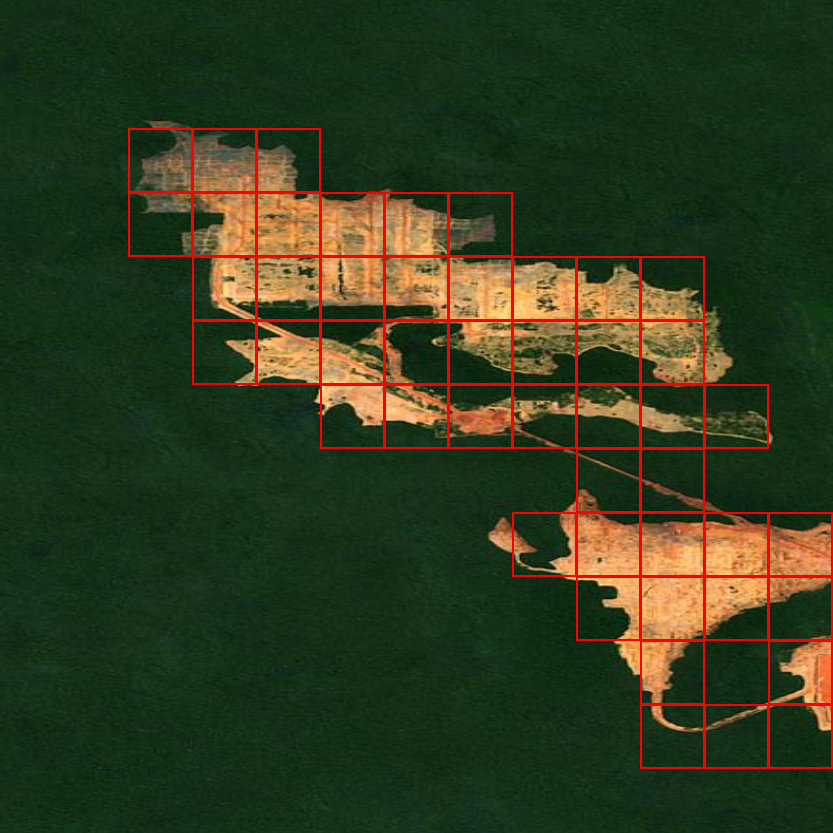

In [121]:
img = get_area(lon, lat, n_tiles=n_tiles, year = year2)
num_forest = 0
for im, is_forest in tqdm(sliding_window(img, loaded_model, 64, 64, dummy_classification=dummy), total=n_tiles**2):
    num_forest += int(is_forest)
img.save(year2 + '.jpg')

area_tile = 0.64**2
total_area = area_tile * n_tiles**2
deforested_area = total_area - num_forest*area_tile
print(f"Total area: {total_area:.3}, deforested_ara: {deforested_area:.3}, Percentage: {deforested_area/total_area:.3%}")
img

In [126]:
img = get_area(lon, lat, n_tiles=n_tiles//2, year = '2018')
num_forest = 0
for im, is_forest in tqdm(sliding_window(img, loaded_model, 64, 64, dummy_classification=dummy), total=n_tiles**2):
    num_forest += int(is_forest)
img.save(year2 + '.jpg')

area_tile = 0.64**2
total_area = area_tile * n_tiles**2
deforested_area = total_area - num_forest*area_tile
print(f"Total area: {total_area:.3}, deforested_ara: {deforested_area:.3}, Percentage: {deforested_area/total_area:.3%}, year = 2018")
img

 21%|██▏       | 36/169 [00:31<01:58,  1.13it/s]

Total area: 69.2, deforested_ara: 68.8, Percentage: 99.408%, year = 2018


625it [00:00, 5822.30it/s]


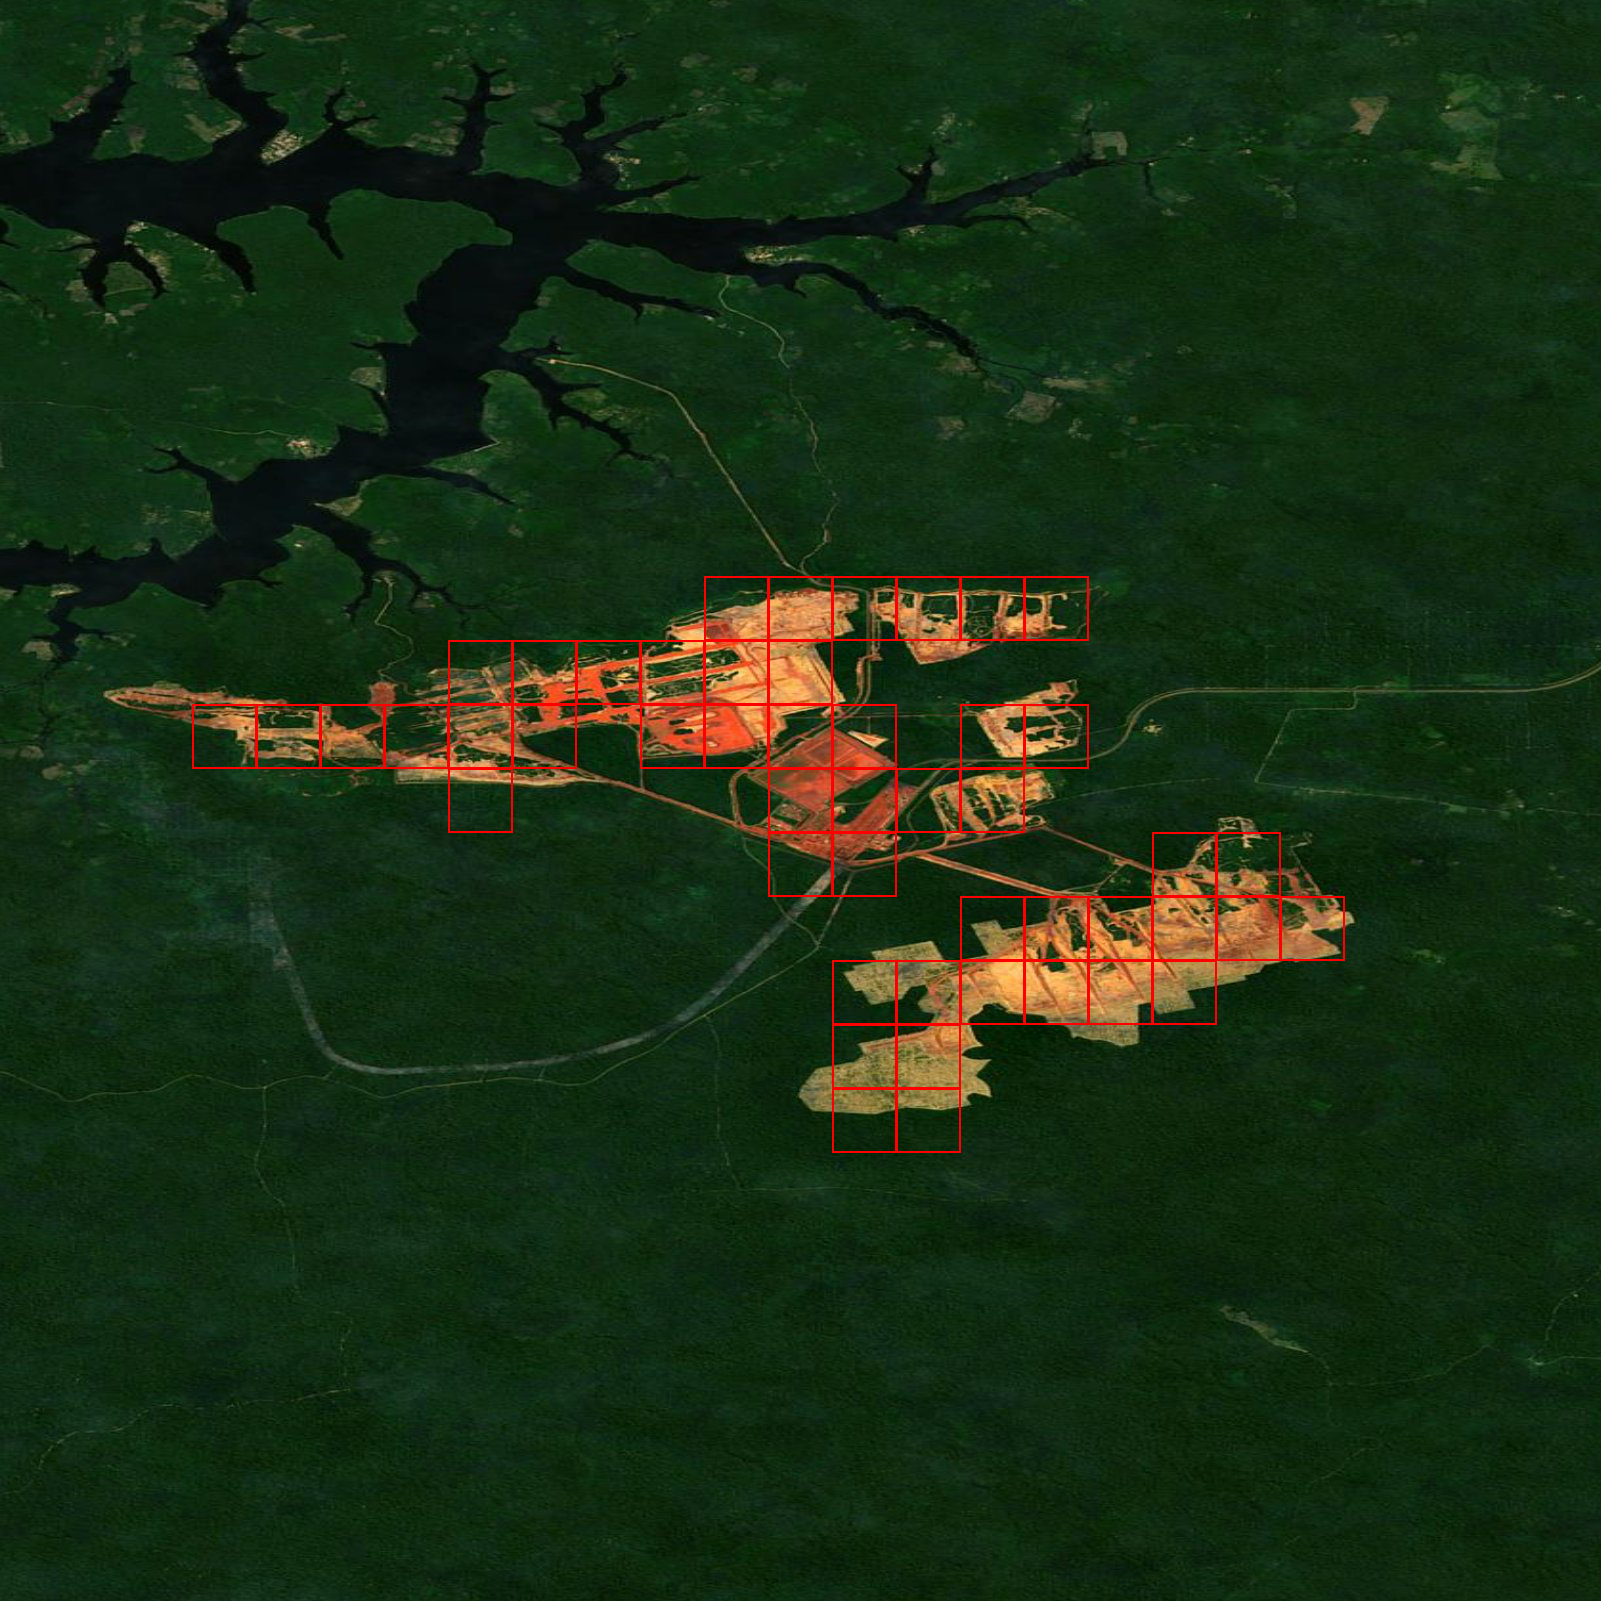

In [ ]:
img = get_area(lon, lat, n_tiles=n_tiles, year = '2020')
for im, is_forest in tqdm(sliding_window(img, 64, 64, dummy_classification=True)):
    pass
img.save('2020.jpg')
d = ImageDraw.Draw(img)
#fnt = #ImageFont.truetype("sans-serif.ttf", 16)
#fnt = ImageFont.load_default()
#fnt = ImageFont.load("arial.pil")
#d.text((10, 10), "2020", font = fnt, fill=(255, 255, 255, 128))
img

In [170]:
import seaborn as sns
sns.set_theme(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")
plt.figure(figsize=(20,10))
# Show the results of a linear regression within each dataset

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.lineplot(x=[2018,2019,2020,2021], y=[69.2-15,69.2-18.4,69.2-19.7,69.2-21.5], markers="o", ls="--", color="g", lw=4)
ax = sns.scatterplot(x=[2018,2019,2020,2021], y=[69.2-15,69.2-18.4,69.2-19.7,69.2-21.5], markers="o", s=500, color="g")
ax.set_xlabel("years", fontsize = 20)
ax.set_ylabel("forest area [km²]", fontsize = 20)


Text(0, 0.5, 'forest area [km²]')